In [56]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from scipy.interpolate import interp1d
%matplotlib inline

ImportError: No module named scipy.interpolate

In [14]:
map_x = []
map_y = []
map_s = []
map_dx = []
map_dy = []

with open('./highway_map.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        contents = row[0]
        x, y, s, dx, dy = contents.split()
        map_x.append(float(x))
        map_y.append(float(y))
        map_s.append(float(s))
        map_dx.append(float(dx))
        map_dy.append(float(dy))

(0.0, 2500.0, 1000.0, 3000.0)

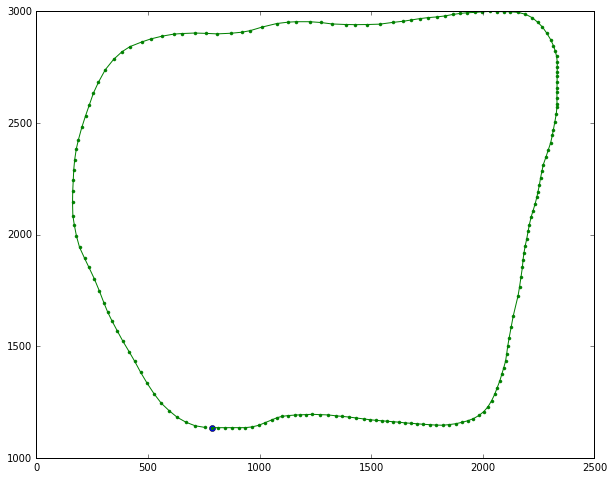

In [48]:
plt.figure(figsize=(10,8))
plt.plot(map_x[0], map_y[0], 'o')
plt.plot(map_x, map_y, '.-')
plt.axis('equal')

(0.0, 2500.0, 1000.0, 3500.0)

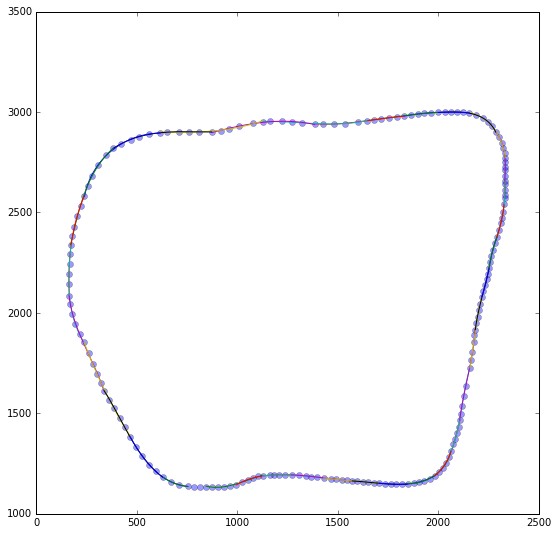

In [77]:
polyfit_interval = 5
n_polyfit = len(map_s) / polyfit_interval
plt.figure(figsize=(9,9))
plt.plot(map_x, map_y, 'o', alpha=0.4)

for i in range(n_polyfit):
    target_s = map_s[(i+1)*polyfit_interval-3:(i+2)*polyfit_interval+3]
    target_x = map_x[(i+1)*polyfit_interval-3:(i+2)*polyfit_interval+3]
    target_y = map_y[(i+1)*polyfit_interval-3:(i+2)*polyfit_interval+3]
    
    x_given_s = poly.polyfit(target_s, target_x, 3)
    y_given_s = poly.polyfit(target_s, target_y, 3)
    s_range = np.linspace(target_s[0], target_s[-1], 200)
    x_fit = poly.polyval(s_range, x_given_s)
    y_fit = poly.polyval(s_range, y_given_s)
    plt.plot(x_fit, y_fit)
    
plt.axis('equal')
    

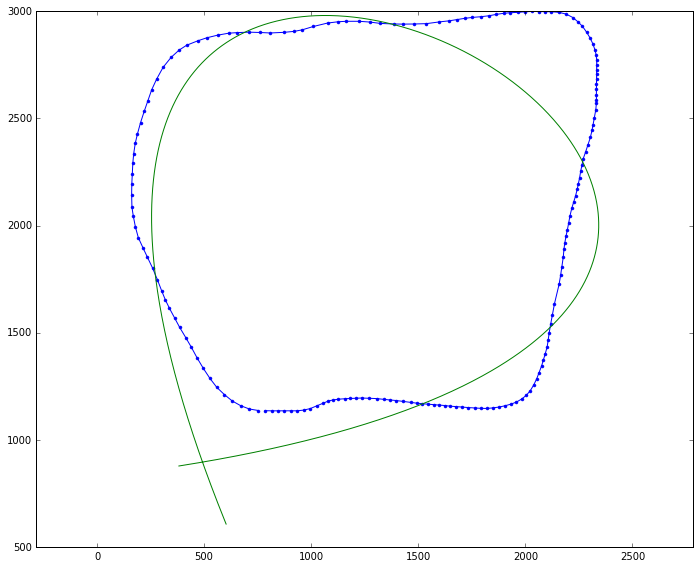

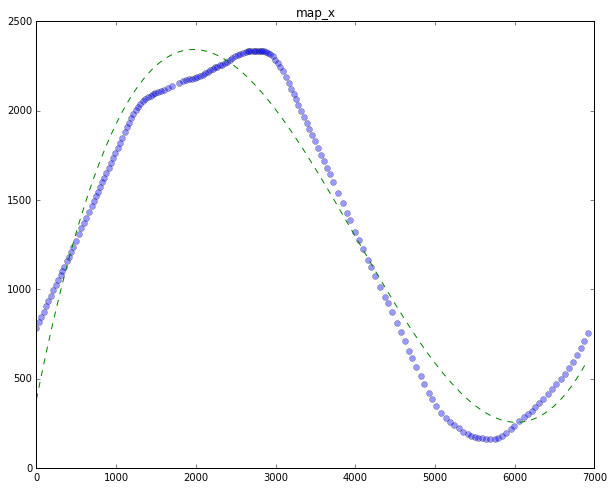

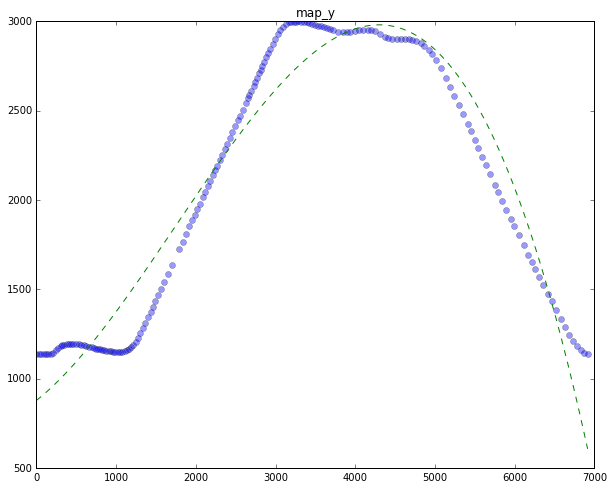

In [66]:
x_given_s = poly.polyfit(map_s, map_x, 3)
y_given_s = poly.polyfit(map_s, map_y, 3)
s_range = np.linspace(map_s[0], map_s[-1], num=1000)
x_fit = poly.polyval(s_range, x_given_s)
y_fit = poly.polyval(s_range, y_given_s)

plt.figure(figsize=(10,8))
plt.plot(map_x, map_y, '.-')
plt.plot(x_fit, y_fit)
plt.tight_layout()
plt.axis('equal')

plt.figure(figsize=(10,8))
plt.plot(map_s, map_x, 'o', alpha=0.4)
plt.plot(s_range, x_fit, '--')
plt.title('map_x')

plt.figure(figsize=(10,8))
plt.plot(map_s, map_y, 'o', alpha=0.4)
plt.plot(s_range, y_fit, '--')
plt.title('map_y')